## Import Data

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

In [2]:
#Get Data
listings=pd.read_csv(r'C:\Users\kpali\OneDrive\Documents\Datasets\listings_data.csv')
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12435 entries, 0 to 12434
Columns: 106 entries, id to reviews_per_month
dtypes: float64(30), int64(28), object(48)
memory usage: 10.1+ MB


C:\Users\kpali\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Preview Data
pd.set_option('display.max_columns',110)
pd.set_option('display.max_rows',110)
listings.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,37688,https://www.airbnb.com/rooms/37688,20200514190617,43966,Living in our family home,NaN,A room will be available for a girl/ student (...,A room will be available for a girl/ student (...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/212330/d96...,NaN,162227,https://www.airbnb.com/users/show/162227,Theja,40368,"Perth, Western Australia, Australia",This room will not be available for some time....,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/162227/profil...,https://a0.muscache.com/im/users/162227/profil...,NaN,1,1,"['email', 'phone', 'facebook', 'jumio', 'gover...",t,t,"Leeming, WA, Australia",NaN,MELVILLE,NaN,Leeming,WA,6149,Perth,"Leeming, Australia",AU,Australia,-32.06806,115.87674,t,House,Private room,1,2.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,78,435.0,NaN,NaN,NaN,1,0,1,730,1,1,730,730,1.0,730.0,never,t,30,60,90,365,43966,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,moderate,f,f,1,0,1,0,NaN
1,42713,https://www.airbnb.com/rooms/42713,20200514190617,43967,Bed with Breakfast,We welcome you to this old character home with...,We live in an old (140yo) authentic Australian...,We welcome you to this old character home with...,none,Dongara is a west coast seaside town. The tow...,"The bedrooms are up stairs, the bathroom is d...",Being a small town there is no public transpor...,"Guests have access to lounge, dining, bathroo...",We generally socialise with guests if it suits...,"No Smoking inside, basic courtesy and manners,...",NaN,NaN,https://a0.muscache.com/im/pictures/8703808/19...,NaN,186576,https://www.airbnb.com/users/show/186576,Denise,40390,AU,Not applicable,within a few hours,1.00,0.80,f,https://a0.muscache.com/im/users/186576/profil...,https://a0.muscache.com/im/users/186576/profil...,NaN,1,1,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,"Dongara, WA, Australia",NaN,IRWIN,NaN,Dongara,WA,6525,Other (International),"Dongara, Australia",AU,Australia,-29.25216,114.93205,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Free parking on premises"",Washer/Dryer,...",215.0,95,NaN,NaN,NaN,NaN,2,20,1,730,1,1,730,730,1.0,730.0,3 months ago,t,30,60,90,365,43967,7,3,42158.0,43741.0,89.0,9.0,8.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,

## Cleaning Data

In [4]:
#Drop Irrelevant/ Duplicate Columns
listings.drop(['listing_url','scrape_id','last_scraped','experiences_offered','thumbnail_url','medium_url',
            'picture_url','xl_picture_url','host_id','host_location','host_about','host_thumbnail_url',
            'host_picture_url','host_neighbourhood','host_has_profile_pic','street','neighbourhood',
            'neighbourhood_group_cleansed','state','zipcode','smart_location','country_code','country','latitude',
            'longitude','is_location_exact','square_feet','minimum_minimum_nights','maximum_minimum_nights',
            'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
            'has_availability','calendar_last_scraped','number_of_reviews_ltm','first_review','last_review','license',
            'requires_license','jurisdiction_names','require_guest_profile_picture','id','host_url','host_name',
            'is_business_travel_ready','space','description','neighborhood_overview','notes','transit','access',
            'interaction','house_rules','host_since','host_listings_count','host_total_listings_count',
            'host_verifications','summary','calculated_host_listings_count',
            'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
            'calculated_host_listings_count_shared_rooms','market','calendar_updated'],axis=1,inplace=True)

In [5]:
#Fillna
listings=listings.fillna(0,axis=1)

In [6]:
#Host Repsonse/Acceptance Rate to Values/100
listings[['host_response_rate','host_acceptance_rate']]=listings[['host_response_rate','host_acceptance_rate']]*100

#Convert 0 Host Repsonse Time to string
listings['host_response_time']=listings['host_response_time'].replace(0,'not specified')

## Exploratory Data Analysis

<AxesSubplot:>

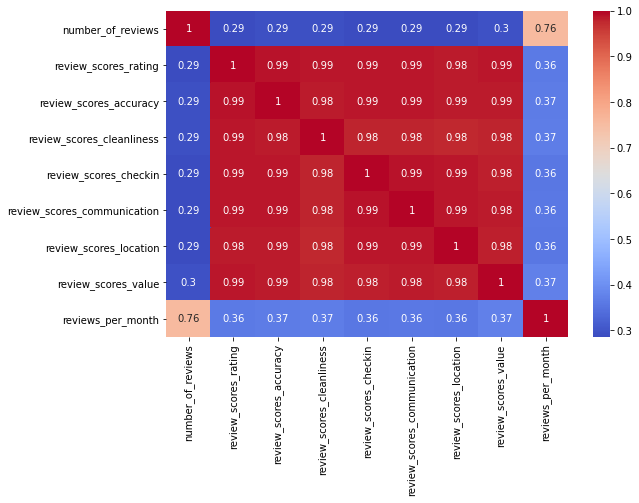

In [7]:
#Check for correlation between review columns
review_info=listings[['number_of_reviews','review_scores_rating','review_scores_accuracy',
                      'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                      'review_scores_location','review_scores_value','reviews_per_month']].corr()
plt.figure(figsize=((9,6)))
sns.heatmap(review_info,cmap='coolwarm',annot=True)

In [8]:
#"Successful" listing is considered as a listing with a review_scores_rating>80.0
successful_listing=listings[listings['review_scores_rating']>80.0]

Text(0.5, 1.0, 'Number of Reviews vs Reviews per Month')

<Figure size 648x432 with 0 Axes>

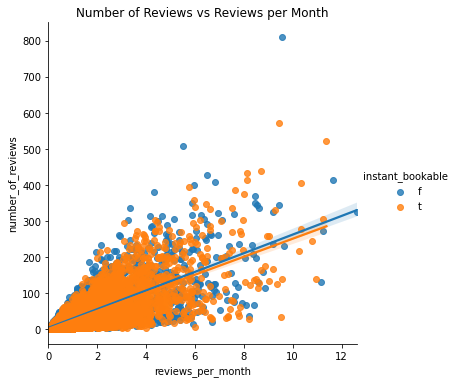

In [9]:
#Relationship between number_of_reviews and reviews_per_month and if being instantly_bookable has any impact
plt.figure(figsize=((9,6)))
sns.lmplot(x='reviews_per_month',y='number_of_reviews',data=successful_listing,hue='instant_bookable')
plt.title('Number of Reviews vs Reviews per Month')

<AxesSubplot:title={'center':'Cancellation Policy for Successful Airbnb Listings'}, xlabel='cancellation_policy', ylabel='count'>

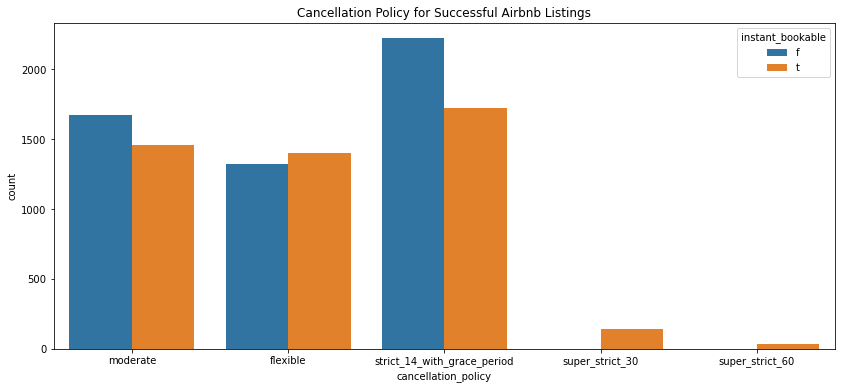

In [10]:
#Cancellation policy for successful Airbnb Listings
plt.figure(figsize=((14,6)))
plt.title('Cancellation Policy for Successful Airbnb Listings')
sns.countplot(x='cancellation_policy',hue='instant_bookable',data=successful_listing)

In [11]:
#Host info
successful_hostinfo=successful_listing[['name','host_response_time','host_response_rate','host_acceptance_rate',
                                        'host_is_superhost','host_identity_verified']]
successful_hostinfo.head()

,name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified
1,Bed with Breakfast,within a few hours,100.0,80.0,f,f
3,Trewent Farmhouse - rustic & rambling,within a few hours,100.0,97.0,t,t
4,family home in canning vale,not specified,0.0,0.0,f,t
5,"Bright but cosy Fremantle Unit, 1-2 Guests",within a day,90.0,83.0,f,f
6,Palms Bed and Breakfast,within an hour,67.0,100.0,f,t


In [12]:
#Top 25 most common words in listing titles
from collections import Counter

common_words=" ".join(successful_hostinfo['name'].values.tolist()).split(" ")
new_common=[]

#Remove joining words and words describing property type
joining_words=['-','to','in','the','&','The','','and','with','on','of']
property_types=['House','Apartment','Villa','Bungalow','Room','Studio','Cottage','Bed','Townhouse','Suite',
               'house','apartment','villa','bungalow','room','studio','cottage','townhouse','suite','Home','home']

for word in common_words:
    if word not in joining_words and word not in property_types:
        new_common.append(word)

top_25=Counter(new_common).most_common(25)

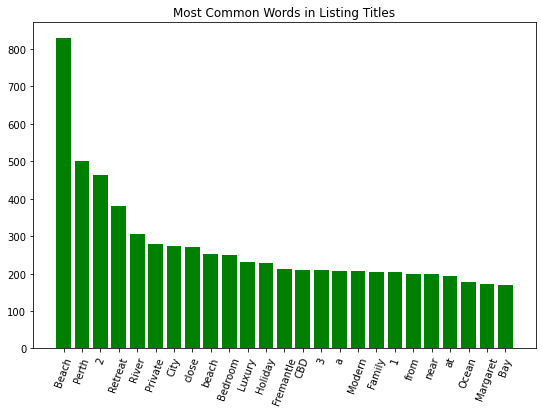

In [13]:
#Graph of most common words in listing titles
plt.figure(figsize=((9,6)))
plt.bar(range(len(top_25)),[val[1] for val in top_25],align='center',color='green')
plt.xticks(range(len(top_25)),[val[0] for val in top_25])
plt.xticks(rotation=70)
plt.title('Most Common Words in Listing Titles')
plt.show()

C:\Users\kpali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Host Response Times'}, xlabel='host_response_time', ylabel='count'>

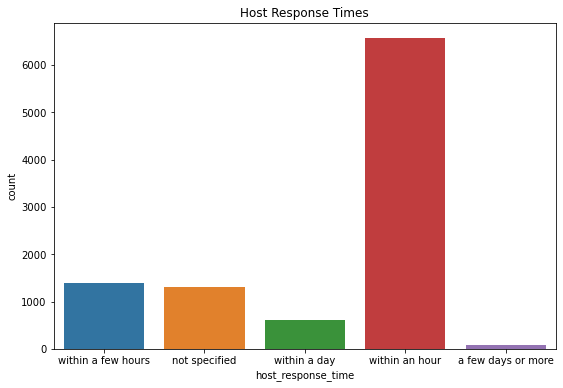

In [14]:
#Host Response Times
plt.figure(figsize=(9,6))
plt.title('Host Response Times')
sns.countplot(successful_hostinfo['host_response_time'])

<AxesSubplot:title={'center':'Host Acceptance Rate vs Host Response Rate'}, xlabel='host_response_rate', ylabel='host_acceptance_rate'>

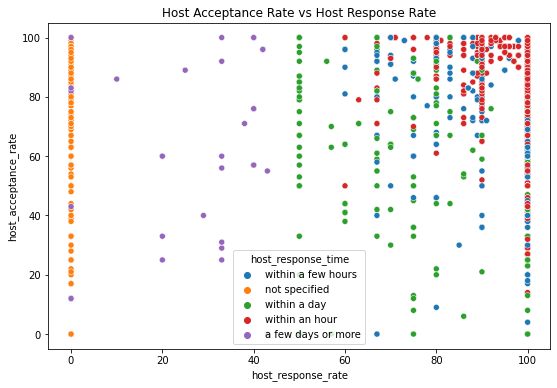

In [15]:
#Relationship between host_response_rate and host_acceptance_rate with varying host_response_times
plt.figure(figsize=((9,6)))
plt.title('Host Acceptance Rate vs Host Response Rate')
sns.scatterplot(x='host_response_rate',y='host_acceptance_rate',data=successful_hostinfo,hue='host_response_time')

<AxesSubplot:title={'center':'Host Acceptance Rate vs Host Response Rate'}, xlabel='host_response_rate', ylabel='host_acceptance_rate'>

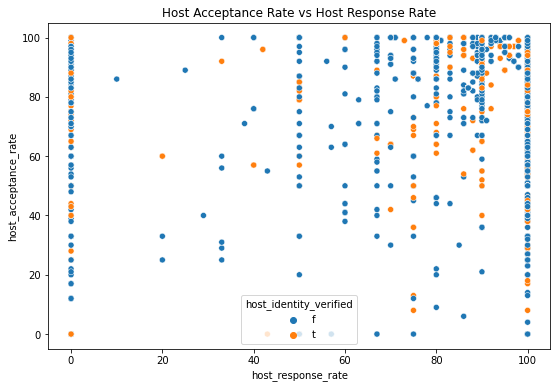

In [16]:
#Impact of host_identity_verification on relationship
plt.figure(figsize=((9,6)))
plt.title('Host Acceptance Rate vs Host Response Rate')
sns.scatterplot(x='host_response_rate',y='host_acceptance_rate',data=successful_hostinfo,hue='host_identity_verified')

In [17]:
#Location data on successful_listing
successful_location=successful_listing[['neighbourhood_cleansed','city','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities']]
successful_location.head()

,neighbourhood_cleansed,city,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities
1,IRWIN,Dongara,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Free parking on premises"",Washer/Dryer,..."
3,MANJIMUP,Smith Brook,House,Entire home/apt,8,1.0,5.0,6.0,Real Bed,"{TV,Kitchen,""Free parking on premises"",""Pets l..."
4,GOSNELLS,Perth,House,Private room,1,1.5,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""..."
5,FREMANTLE,Fremantle,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Wheelchair accessible"",Kitchen,""Free..."
6,JOONDALUP,Perth,Bed and breakfast,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,""Free parking..."


C:\Users\kpali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Most Popular Regions for Airbnb Listings'}, xlabel='neighbourhood_cleansed', ylabel='count'>

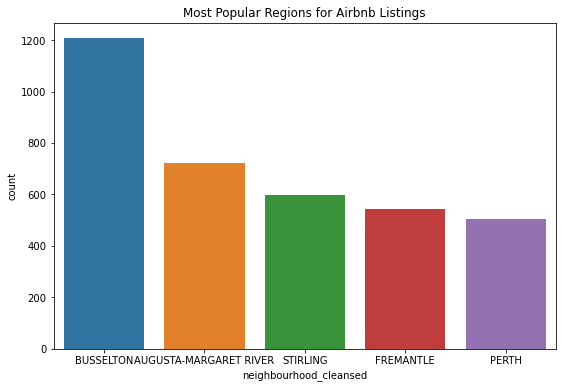

In [18]:
#Five most popular regions for Airbnb listings
plt.figure(figsize=((9,6)))
plt.title('Most Popular Regions for Airbnb Listings')
sns.countplot(successful_location['neighbourhood_cleansed'],
              order=successful_location['neighbourhood_cleansed'].value_counts().iloc[:5].index)

<AxesSubplot:title={'center':'Popular Suburbs'}, xlabel='count', ylabel='city'>

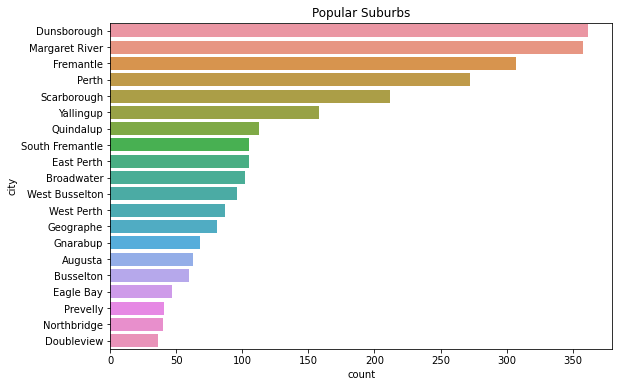

In [19]:
#Most popular suburbs within those regions
popular_locations=['BUSSELTON','AUGUSTA-MARGARET RIVER','STIRLING','FREMANTLE','PERTH']
cities=successful_location['neighbourhood_cleansed'].isin(popular_locations)
successful_city=successful_location[cities]
plt.figure(figsize=((9,6)))
plt.title('Popular Suburbs')
sns.countplot(y='city',data=successful_city,order=successful_city['city'].value_counts().iloc[:20].index)

<AxesSubplot:title={'center':'Room Types'}, xlabel='room_type', ylabel='count'>

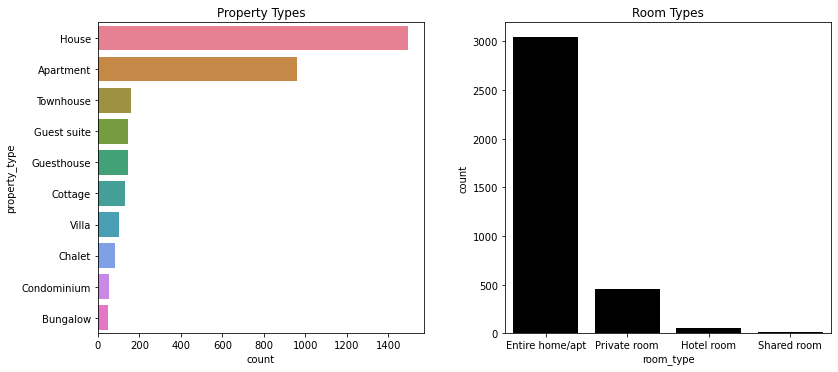

In [20]:
#Property Type and Room Type
fig,axes=plt.subplots(1,2,figsize=((12,6)))
fig.tight_layout(pad=5.0)
axes[0].title.set_text('Property Types')
axes[1].title.set_text('Room Types')
sns.countplot(y='property_type',data=successful_city,
              order=successful_city['property_type'].value_counts().iloc[0:10].index,orient='horizontal',
              palette='husl',ax=axes[0])
sns.countplot(x='room_type',data=successful_city,order=successful_city['room_type'].value_counts().iloc[0:10].index,
              color='black',ax=axes[1])

In [21]:
#Summary Statistics of Accomodation
successful_city[['accommodates','bathrooms','bedrooms','beds']].describe()

,accommodates,bathrooms,bedrooms,beds
count,3577.000000,3577.000000,3577.000000,3577.000000
mean,4.970087,1.577299,2.247134,3.147051
std,2.838779,0.804138,1.309013,2.225705
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,4.000000,1.000000,2.000000,3.000000
75%,6.000000,2.000000,3.000000,4.000000
max,30.000000,10.000000,9.000000,21.000000


In [22]:
#Most common amenities within popular regions
amenities=' '.join(successful_city['amenities'].values.tolist()).split(' ')
from collections import Counter
amenities_lst=[]
non_amenities=[',','and','on','or']
for amenity in amenities:
    if amenity not in non_amenities:
        amenities_lst.append(amenity)
common_amenities=Counter(amenities_lst).most_common(25)

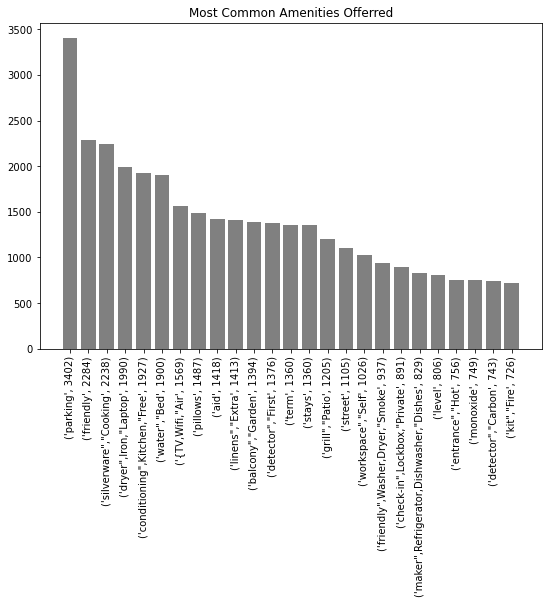

In [23]:
#Graph of popular amenities
plt.figure(figsize=((9,6)))
plt.bar(range(len(common_amenities)),[val[1] for val in common_amenities],align='center',color='grey')
plt.xticks(range(len(common_amenities)),[val[0:len(common_amenities)] for val in common_amenities])
plt.xticks(rotation=90)
plt.title('Most Common Amenities Offerred')
plt.show()

In [24]:
#Pricing Information
pricing_data=successful_listing[['price','weekly_price','monthly_price','security_deposit','cleaning_fee',
                                 'extra_people']]
successful_pricing=pd.concat([successful_city,pricing_data],axis=1)

In [25]:
successful_pricing.head()

,neighbourhood_cleansed,city,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,0.0,0.0,0.0,0.0,20
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221,990.0,0.0,300.0,0.0,20
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,490.0,0.0,200.0,0.0,25
5,FREMANTLE,Fremantle,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Wheelchair accessible"",Kitchen,""Free...",62,0.0,0.0,200.0,0.0,10
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,0.0,0.0,200.0,0.0,0


C:\Users\kpali\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\kpali\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\kpali\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

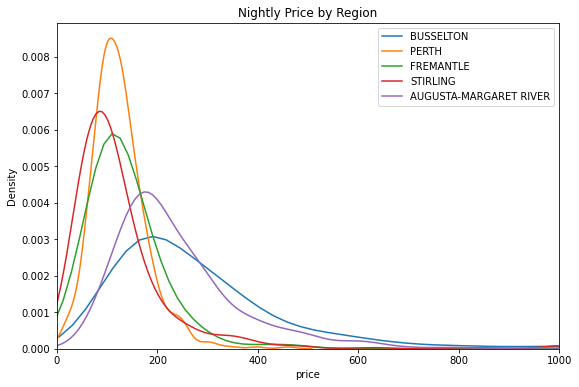

In [26]:
#Price Distributions within the most popular regions
popular_locations=['BUSSELTON','PERTH','FREMANTLE','STIRLING','AUGUSTA-MARGARET RIVER']

plt.figure(figsize=(9,6))
plt.xlim(0,1000)
plt.title('Nightly Price by Region')
for x in popular_locations:
    sns.distplot(a=successful_pricing[successful_pricing['neighbourhood_cleansed']== str(x)]['price'],hist=False)
plt.legend(popular_locations)
plt.show()

<AxesSubplot:title={'center':'Nightly Price vs Security Deposit'}, xlabel='security_deposit', ylabel='price'>

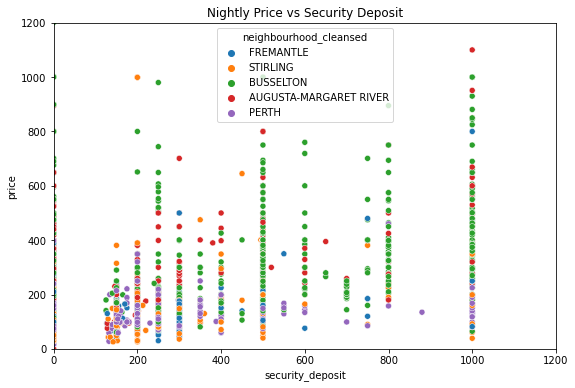

In [27]:
#Relationship between security_deposit and price in popular regions
plt.figure(figsize=((9,6)))
plt.xlim(0,1200)
plt.ylim(0,1200)
plt.title('Nightly Price vs Security Deposit')
sns.scatterplot(x='security_deposit',y='price',data=successful_pricing,hue='neighbourhood_cleansed')

<AxesSubplot:title={'center':'Nightly Price vs Cleaning Fee'}, xlabel='cleaning_fee', ylabel='price'>

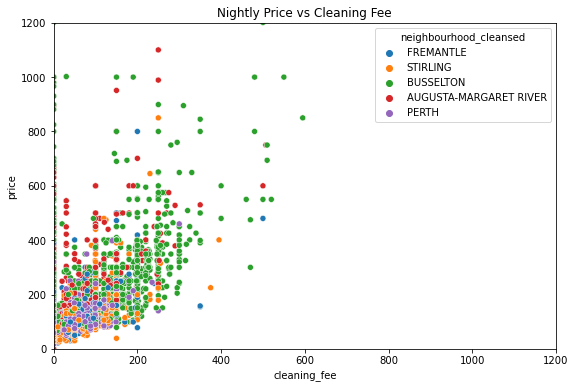

In [28]:
#Relationship between price and cleaning_fee in varying regions
plt.figure(figsize=((9,6)))
plt.xlim(0,1200)
plt.ylim(0,1200)
plt.title('Nightly Price vs Cleaning Fee')
sns.scatterplot(x='cleaning_fee',y='price',data=successful_pricing,hue='neighbourhood_cleansed')

<AxesSubplot:title={'center':'Nightly Price vs Extra Person Fee'}, xlabel='extra_people', ylabel='price'>

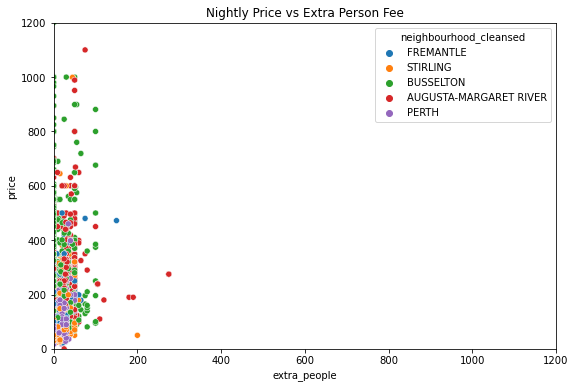

In [29]:
#Relationship between price and cleaning_fee in varying regions
plt.figure(figsize=((9,6)))
plt.xlim(0,1200)
plt.ylim(0,1200)
plt.title('Nightly Price vs Extra Person Fee')
sns.scatterplot(x='extra_people',y='price',data=successful_pricing,hue='neighbourhood_cleansed')

In [30]:
#Availability information
availability=successful_listing[['minimum_nights','maximum_nights','availability_30','availability_60',
                                 'availability_365']]
successful_availability=pd.concat([successful_city,availability],axis=1)

In [31]:
#Summary of availability information
successful_availability[['minimum_nights','maximum_nights','availability_30','availability_60'
                         ,'availability_365']].describe()

,minimum_nights,maximum_nights,availability_30,availability_60,availability_365
count,9975.000000,9975.000000,9975.000000,9975.000000,9975.000000
mean,2.998095,681.351679,14.502356,33.011429,201.087920
std,11.055808,522.917666,12.073623,23.953452,134.362874
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,59.000000,0.000000,1.000000,77.000000
50%,2.000000,1125.000000,15.000000,43.000000,215.000000
75%,3.000000,1125.000000,27.000000,56.000000,336.000000
max,365.000000,3665.000000,30.000000,60.000000,365.000000


<AxesSubplot:>

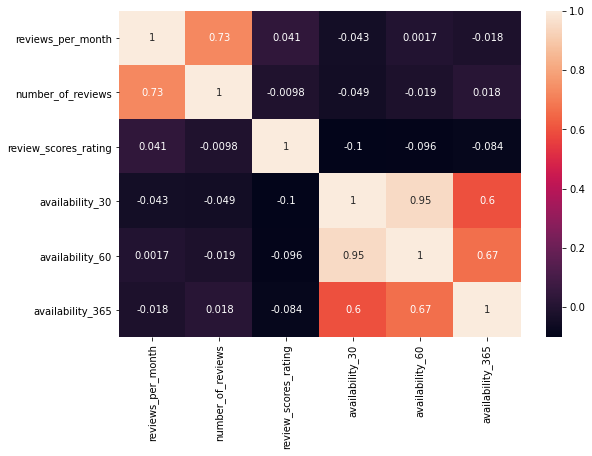

In [32]:
#Correlation between review-info and availability data
plt.figure(figsize=((9,6)))
listing_corr=successful_listing[['reviews_per_month','number_of_reviews','review_scores_rating',
                                 'availability_30','availability_60','availability_365']].corr()
sns.heatmap(listing_corr,annot=True)

In [33]:
#Create column for review_scores >80
listings['review_scores_rating >80']=[1 if x>80.0 else 0 for x in listings['review_scores_rating']]
listings=listings.drop('review_scores_rating',axis=1)

## Applying Logistic Regression to Predict Successful Listing

In [34]:
#Drop columns not needed for Logistic Regression
listings=listings.fillna(0,axis=1)
listings=listings.drop(['name','amenities'],axis=1)

In [35]:
#Convert categorical data to dummy variables
dummies=pd.get_dummies(listings[['host_response_time','host_identity_verified','host_is_superhost',
                                 'neighbourhood_cleansed','city','property_type','room_type','bed_type',
                                 'cancellation_policy','instant_bookable','require_guest_phone_verification']],
                                drop_first=True)


listings=pd.concat([listings.drop(['host_response_time','host_identity_verified','host_is_superhost',
                                   'neighbourhood_cleansed','city','property_type','room_type','bed_type',
                                   'cancellation_policy','instant_bookable',
                                  'require_guest_phone_verification'],axis=1),dummies],axis=1)

In [36]:
#Apply Logistic Regression to data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

listings=listings.drop(['review_scores_accuracy','review_scores_cleanliness',
                        'review_scores_checkin','review_scores_communication',
                        'review_scores_location','review_scores_value'],axis=1)

X=listings.drop('review_scores_rating >80',axis=1)
y=listings['review_scores_rating >80']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=101)
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)

C:\Users\kpali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 559  160]
 [ 116 2896]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       719
           1       0.95      0.96      0.95      3012

    accuracy                           0.93      3731
   macro avg       0.89      0.87      0.88      3731
weighted avg       0.92      0.93      0.93      3731

